# SQL: on `school` Database

In [1]:
import pandas as pd
import os
import os.path
import json
import sys
import importlib

module_dir = "../../modules"
module_path = os.path.abspath(module_dir)
if not module_path in sys.path:
    sys.path.append(module_path)

import dbutil
importlib.reload(dbutil)

%load_ext sql

## Instructions

### Set User Credentials

> **Edit `creds.json` to reflect your mysql user and password**

> This must be done **prior** to executing the following cell 

In general, you will be able to choose whether you are using the remote MySQL database or the SQLite database(s) by setting the `dbsource` variable to `"mysql"` or `"sqlite"` respectively.  The function `dbutil.db_cstring` function computes a *connection string* for the chosen `dbsource` using the information in the `creds.json` file.  If the last argument to this function is present, the generated connection string uses that datbase as superceding the name of the database in `creds.json`.

In [2]:
dbsource = "sqlite"
db = "school"
cstring = dbutil.db_cstring(dbsource, "creds.json", ".", db)

In [3]:
print("Connection string:", cstring)

Connection string: sqlite:///../../dbfiles/school.db


In [4]:
%sql $cstring

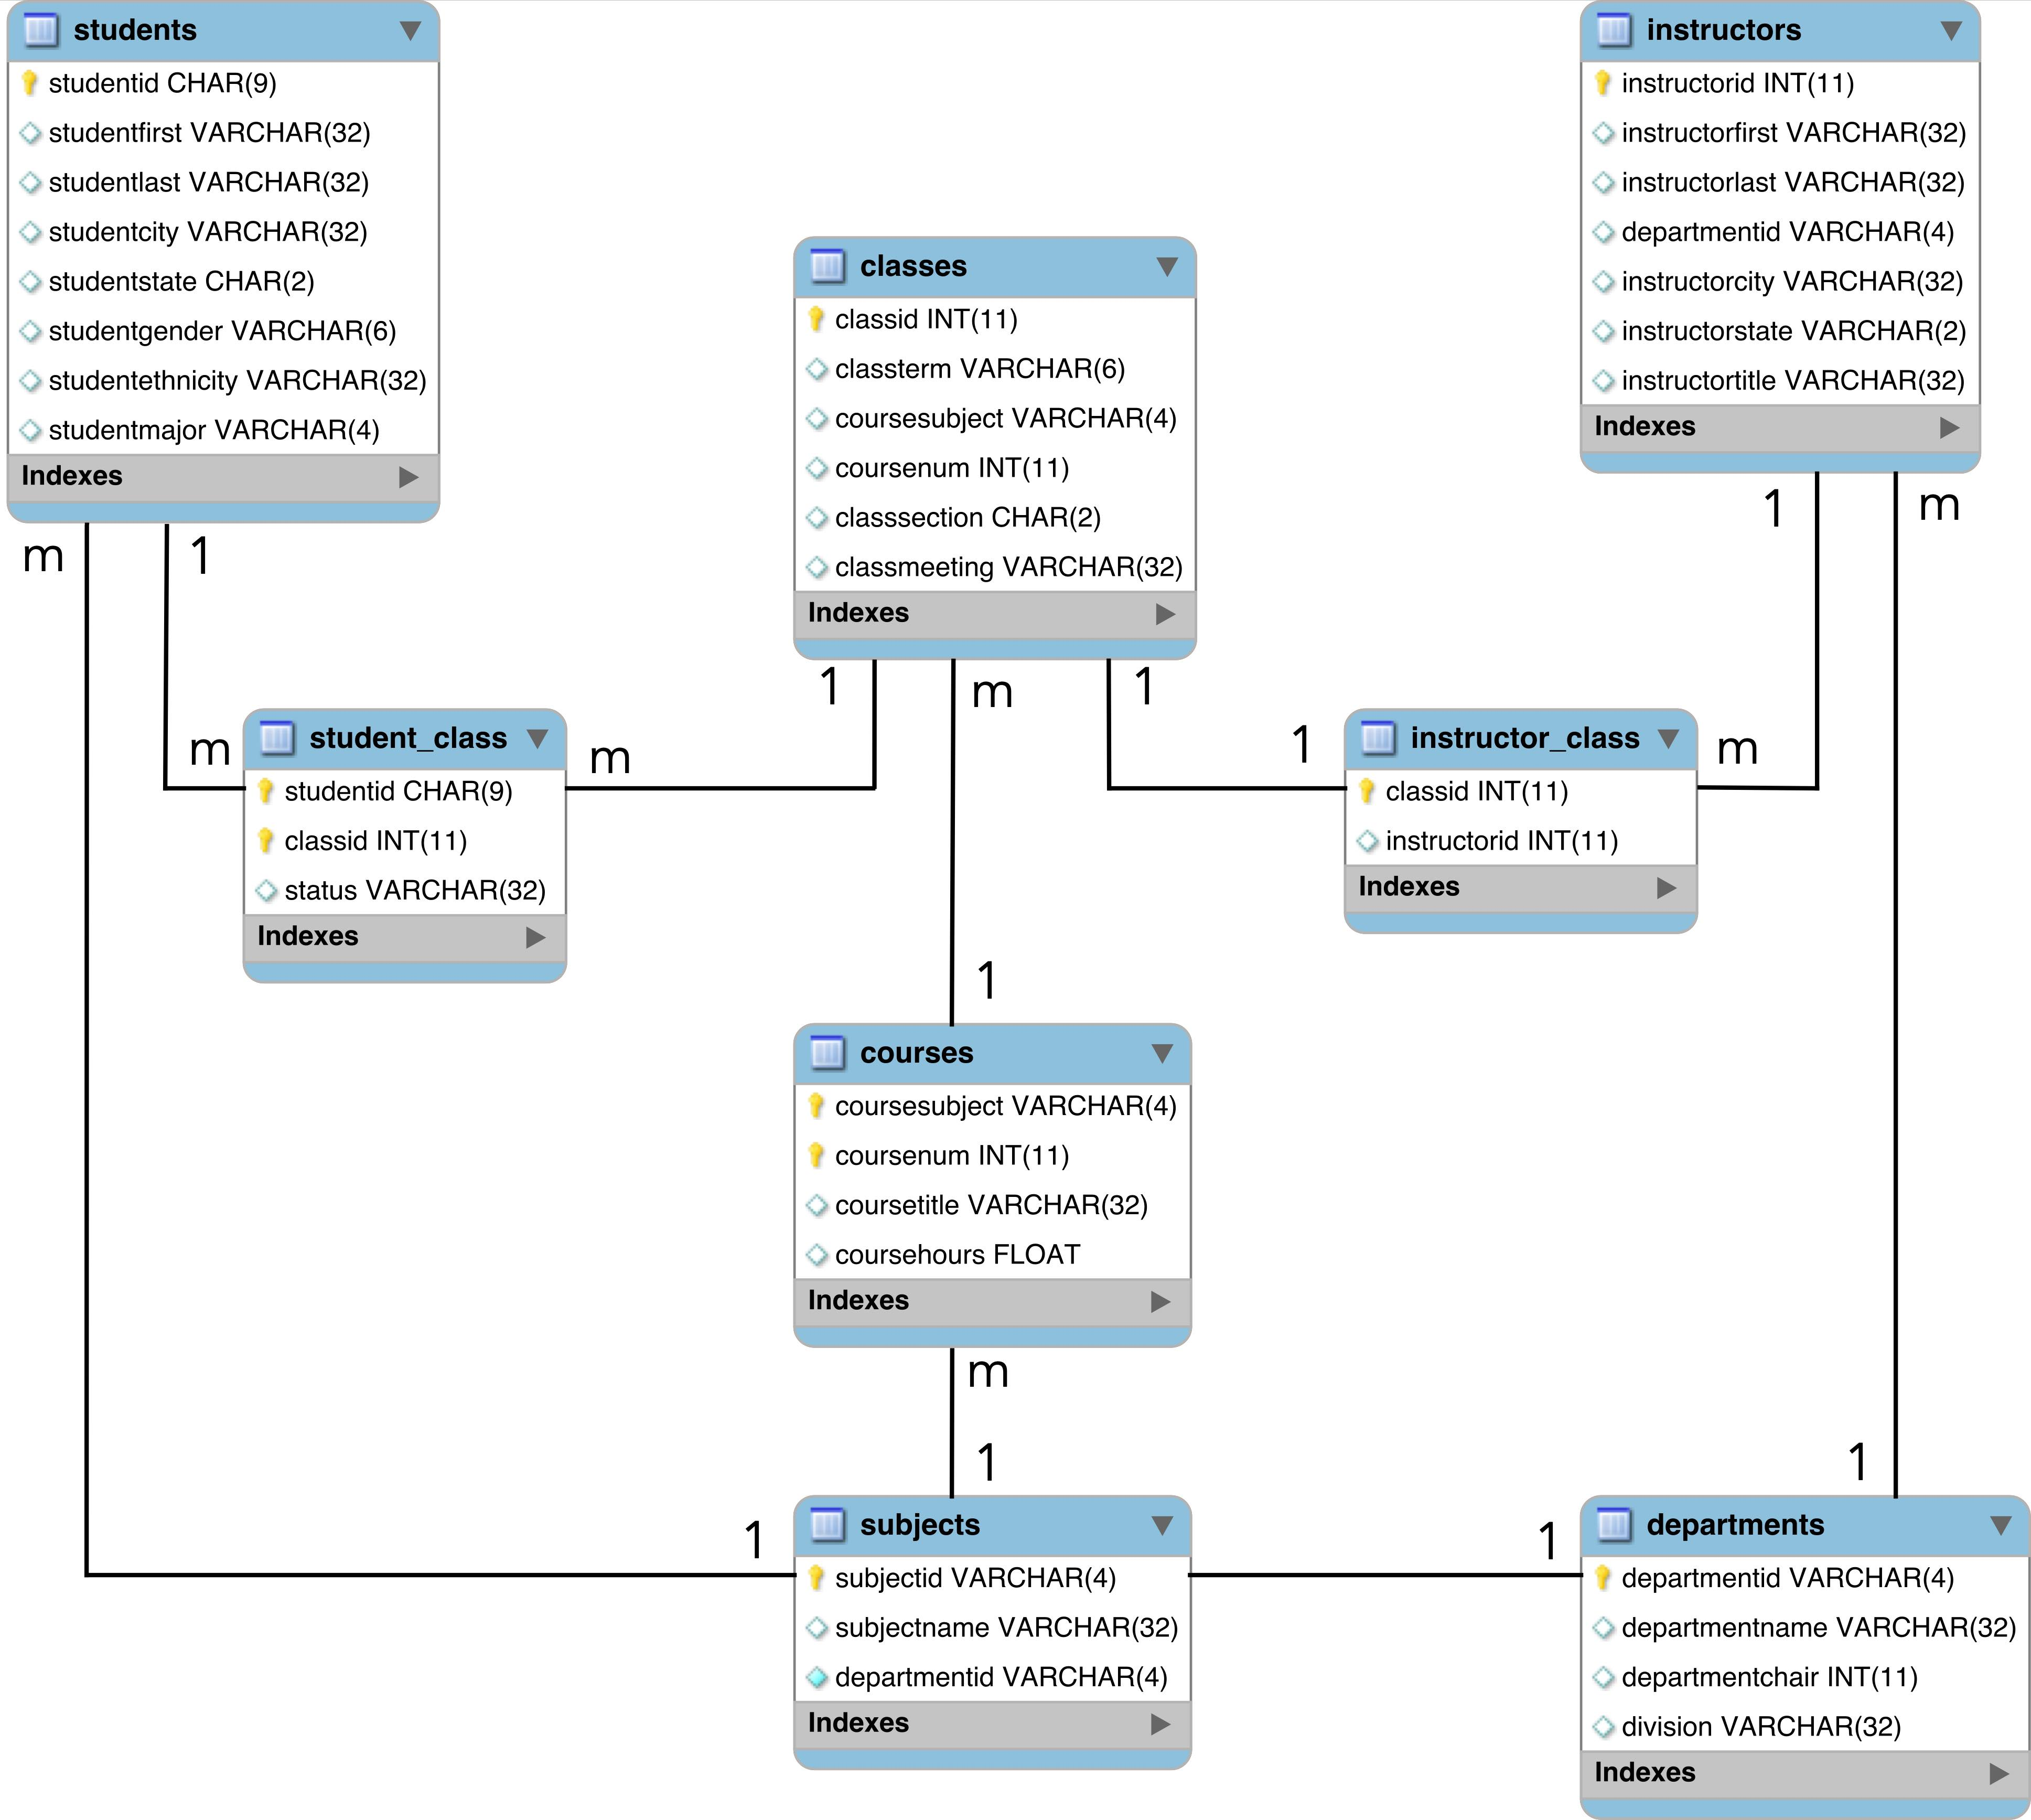

In [1]:
from IPython.display import Image
Image("hwimages/school_schema.jpg", width=700, height=700)

**Q1** In reference to the `school` database, please list, for every instructor, how many classes they were teaching. Zero should be an option (e.g., if the professor was on sabbatical). Include the first and last name of the instructor, and alias your new column as `num_classes`.

In [8]:
# Solution cell
query = """
"""
### BEGIN SOLUTION
query = """
SELECT I.instructorfirst, I.instructorlast, COUNT(*) as num_classes
FROM instructors AS I
LEFT JOIN instructor_class AS IC 
ON I.instructorid = IC.instructorid
GROUP BY I.instructorid
"""
# Note: num_classes is never 0
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
print(len(resultdf))
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.
292


instructorfirst instructorlast  num_classes
0         Brandon         Santos            4
1         Margaux         Gillet            1
2             Tom         Werner            4
3           Roger       Davidson            1
4          Sharon        Jimenez            6

In [9]:
# Testing cell
assert len(resultdf) == 292
assert 18 in list(resultdf['num_classes'])

**Q2** Find the departments (id only) that offer more than one subject. Keep the default ordering (alphabetical by `departmentid`).  Note that this is different than pattern matching on department name.

In [10]:
# Solution cell

query = """
"""
### BEGIN SOLUTION
query = """
SELECT D.departmentid, COUNT(*) as count
FROM departments as D
INNER JOIN subjects as S
ON D.departmentid = S.departmentid
GROUP BY D.departmentname
HAVING count > 1
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.


departmentid  count
0          ART      2
1         CHEM      2
2         CLAS      3
3         EDUC      4
4         ENGL      2

In [11]:
# Testing cell
assert len(resultdf) == 11
assert resultdf.loc[3, 'count'] == 4
assert resultdf.loc[8, 'count'] == 8

**Q3** For each course, find the total number of students who took that course (any section) over the whole year. Please order your results by course subject (alphabetical) and then by course number (ascending).

In [13]:
#Solution cell

query = """
"""
### BEGIN SOLUTION
# Needs student_class
query = """
SELECT coursesubject,coursenum,COUNT(*)
FROM students as S
INNER JOIN student_class as SC using(studentid)
INNER JOIN classes as C using(classid)
INNER JOIN courses as CO using(coursesubject,coursenum)
GROUP BY coursesubject,coursenum
ORDER BY coursesubject, coursenum ASC
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
print(len(resultdf))
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.
809


coursesubject  coursenum  COUNT(*)
0          ARAB        111        28
1          ARAB        112        23
2          ARAB        211         9
3          ARAB        361         9
4          ARTH        151        28

In [14]:
# Testing cell
assert len(resultdf) == 809

**Q4** In reference to the `school` database, please list, for each course, the number of class sections being taught in the spring. Call your new column `numSections`.

In [17]:
# Solution cell
query = """
"""
### BEGIN SOLUTION
query = """
SELECT CO.coursesubject, CO.coursenum, COUNT(*) as numSections 
FROM courses as CO
LEFT JOIN classes as C
ON CO.coursenum = C.coursenum AND CO.coursesubject = C.coursesubject
WHERE C.classterm = 'SPRING' 
GROUP BY CO.coursesubject, CO.coursenum
ORDER BY numSections DESC, CO.coursesubject ASC, CO.coursenum ASC
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.


coursesubject  coursenum  numSections
0           FYS        102           18
1           FYS        101           14
2          BIOL        452           11
3          BIOL        362           10
4          PHED        350           10

In [19]:
# Testing cell
assert len(resultdf) == 513
assert list(resultdf.columns) == ['coursesubject','coursenum','numSections']
assert max(list(resultdf['numSections'])) == 18
assert resultdf.loc[0, 'numSections'] == 18

**Q5** For each class, find the number of students who took the class (call it `count`), along with the class id, course subject, and course number. Please order your results by `count`, from highest to lowest. Please only include students who were *registered* for the class (see the `status` column). Ignore the `classmeeting` column. Your resulting data frame will include classes that don't actually meet, but are used to assign students AP credit.

In [20]:
#Solution cell

query = """
"""
### BEGIN SOLUTION
query = """
SELECT C.classid,C.coursesubject, C.coursenum,COUNT(*) as count
FROM students as S
INNER JOIN student_class as SC using(studentid)
INNER JOIN classes as C ON C.classid = SC.classid
WHERE status = '**Registered**'
GROUP BY C.classid
ORDER BY count DESC
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
print(len(resultdf))
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.
1627


classid coursesubject  coursenum  count
0    40767          SPAN        111    226
1    40902          MATH         97    148
2    40717          INTD         75    101
3    40768          SPAN        112     93
4    21003          INTD         75     85

**Q6** For each class meeting time, find the total number of students who took a class during that meeting time. Please don't include classes without a meeting time, call your new column `count`, and order your results by `count` (from most popular to least popular). For a challenge, graph this data in some way, to see which class meeting times are most popular.

In [21]:
#Solution cell

query = """
"""
### BEGIN SOLUTION
query = """
SELECT C.classmeeting,COUNT(*) as count
FROM students as S
INNER JOIN student_class as SC using(studentid)
INNER JOIN classes as C ON C.classid = SC.classid
WHERE C.classmeeting IS NOT NULL
GROUP BY C.classmeeting
ORDER BY count DESC
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
print(len(resultdf))
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.
135


classmeeting  count
0   10:00-11:20 TR   1549
1  09:30-10:20 MWF   1527
2  10:30-11:20 MWF   1361
3  11:30-12:20 MWF   1354
4   13:30-14:50 TR   1229

In [22]:
# Testing cell
assert len(resultdf) == 135
assert 1549 in list(resultdf.loc[0])

**Q7** For each course, find the number of sections offered over the whole year. Only include courses that were actually offered (so zero should not be an allowed result). Your fields should be `coursesubject, coursenum, numSections` and you should keep the default ordering in the database (by subject and number).

In [23]:
# Solution cell
query = """
"""
### BEGIN SOLUTION
query = """
SELECT CO.coursesubject, CO.coursenum, COUNT(*) as numSections
FROM courses as CO
INNER JOIN classes as C
ON CO.coursesubject = C.coursesubject AND CO.coursenum = C.coursenum
GROUP BY CO.coursesubject, CO.coursenum
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
print(len(resultdf))
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.
810


coursesubject  coursenum  numSections
0          ARAB        111            1
1          ARAB        112            1
2          ARAB        211            1
3          ARAB        361            2
4          ARTH        151            1

**Q8** In reference to the `school` database, what is the average credit hour load of the students, including directed studies? Your answer should be 1 x 1.  Hint: Can you design a solution to the problem of generating a table of students and their associated credit hours?

In [24]:
#Solution cell

query = """
"""
### BEGIN SOLUTION
query = """
SELECT AVG(credits) FROM
(SELECT studentid, SUM(coursehours) as credits 
FROM students as S
INNER JOIN student_class as SC using(studentid)
INNER JOIN classes as C using(classid)
INNER JOIN courses as CO using(coursesubject,coursenum)
GROUP BY studentid
ORDER BY studentid) as t
"""
### END SOLUTION
resultset = %sql $query
resultdf = resultset.DataFrame()
resultdf.head()

 * sqlite:///../../dbfiles/school.db
Done.


AVG(credits)
0     30.283641

In [25]:
# Testing cell
assert len(resultdf) == 1
assert resultdf.iloc[0,0] < 30.3
assert resultdf.iloc[0,0] > 30.2